In [51]:
from viewser.operations import fetch
from viewser import Queryset, Column

#some extra functions for some of the later demonstration
import pandas as pd
import numpy as np
import subprocess

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt



In [28]:
df = Queryset("month_to_annual", "country_month").fetch()

 .    

In [29]:
df

wdi_sh_dyn_mort_fe  wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  \
month_id country_id                                                            
1        1                     4.151040           21.645497        13.564709   
         2                     3.953165           21.704949        12.834983   
         3                     3.616309           22.994549        13.935826   
         4                     3.711130            0.000000        16.537493   
         5                     3.718438           19.784920        12.013131   
...                                 ...                 ...              ...   
852      242                   3.793239           24.884573        17.967941   
         243                   2.844909           25.542467        17.428496   
         244                   3.616309           22.728763        15.344817   
         245                   3.927896           25.101865        17.636672   
         246                   4.552824           23.207989        16.190256   

                     ged_sb_tlag1  ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  \
month_id country_id                                                           
1        1                    0.0           0.0           0.0           0.0   
         2                    0.0           0.0           0.0           0.0   
         3                    0.0           0.0           0.0           0.0   
         4                    0.0           0.0           0.0           0.0   
         5                    0.0           0.0           0.0           0.0   
...                           ...           ...           ...           ...   
852      242                  0.0           0.0           0.0           0.0   
         243                  0.0           0.0           0.0           0.0   
         244                  0.0           0.0           0.0           0.0   
         245                  0.0           0.0           0.0           0.0   
         246                  0.0           0.0           0.0           0.0   

                     ged_sb_tlag5  ged_sb_tlag6  ged_sb_tlag7  ...  \
month_id country_id                                            ...   
1        1                    0.0           0.0           0.0  ...   
         2                    0.0           0.0           0.0  ...   
         3                    0.0           0.0           0.0  ...   
         4                    0.0           0.0           0.0  ...   
         5                    0.0           0.0           0.0  ...   
...                           ...           ...           ...  ...   
852      242                  0.0           0.0           0.0  ...   
         243                  0.0           0.0           0.0  ...   
         244                  0.0           0.0           0.0  ...   
         245                  0.0           0.0           0.0  ...   
         246                  0.0           0.0           0.0  ...   

                     ged_sb_tlag27  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id                                                
1        1                     0.0            0.0            0.0   
         2                     0.0            0.0            0.0   
         3                     0.0            0.0            0.0   
         4                     0.0            0.0            0.0   
         5                     0.0            0.0            0.0   
...                            ...            ...            ...   
852      242                   0.0            0.0            0.0   
         243                   0.0            0.0            0.0   
         244                   0.0            0.0            0.0   
         245                   0.0            0.0            0.0   
         246                   0.0            0.0            0.0   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
month_id country_id                                                
1        1          

In [5]:
df = df.query('month_id > 240 & month_id < 505 & month_id%12 == 0')

In [27]:
df

wdi_sh_dyn_mort_fe  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                      
252      1                     3.732896        13.539826      0.000000   
         2                     3.349904        13.079454      0.000000   
         3                     3.277145        14.102345      0.000000   
         4                     2.990720        17.011230      0.000000   
         5                     3.005683        12.122740      0.000000   
...                                 ...              ...           ...   
504      242                   3.793239        17.967941      1.098612   
         243                   2.844909        17.428496      1.386294   
         244                   3.616309        15.344817      0.000000   
         245                   3.927896        17.636672      0.000000   
         246                   4.552824        16.190256      0.000000   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
252      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
504      242             0.000000      0.000000      1.791759      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245             1.386294      0.000000      0.000000      2.890372   
         246             1.098612      4.189655      3.496508      1.791759   

                     ged_sb_tlag6  ged_sb_tlag7  ged_sb_tlag8  ...  \
month_id country_id                                            ...   
252      1               0.000000      0.000000      0.000000  ...   
         2               0.000000      0.000000      0.000000  ...   
         3               0.000000      0.000000      0.000000  ...   
         4               0.000000      0.000000      0.000000  ...   
         5               0.000000      0.000000      0.000000  ...   
...                           ...           ...           ...  ...   
504      242             0.000000      0.000000      0.000000  ...   
         243             0.000000      0.000000      1.386294  ...   
         244             0.000000      0.000000      0.000000  ...   
         245             0.000000      0.000000      0.000000  ...   
         246             2.397895      2.302585      0.000000  ...   

                     ged_sb_tlag27  ged_sb_tlag28  ged_sb_tlag29  \
month_id country_id                                                
252      1                0.000000       0.000000       0.000000   
         2                0.000000       0.000000       0.000000   
         3                0.000000       0.000000       0.000000   
         4                0.000000       0.000000       0.000000   
         5                0.000000       0.000000       0.000000   
...                            ...            ...            ...   
504      242              0.000000       0.000000       0.000000   
         243              0.000000       0.000000       0.000000   
         244              0.000000       0.000000       0.000000   
         245              0.000000       0.000000       0.000000   
         246              2.833213       1.386294       2.197225   

                     ged_sb_tlag30  ged_sb_tlag31  ged_sb_tlag32  \
month_id country_id                                                
252      1                     0.0       0.000000       0.000000   
         2                    

In [40]:
y = df['wdi_sh_dyn_mort_fe']
X = df.drop(columns=['wdi_sh_dyn_mort_fe'])  # Remove the target column from the features

# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)
#X = X.fillna(X.mean())

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the summary of the OLS model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     761.2
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:48:13   Log-Likelihood:            -2.3660e+05
No. Observations:              158230   AIC:                         4.733e+05
Df Residuals:                  158191   BIC:                         4.737e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3437      0

In [41]:
predictions = results.predict(X)

In [42]:
predictions

month_id  country_id
1         1             2.856035
          2             2.699564
          3             2.790334
          4             5.747838
          5             2.732625
                          ...   
852       242           3.421243
          243           3.240908
          244           3.108359
          245           3.330167
          246           3.231911
Length: 158230, dtype: float64

In [49]:
r2 = mean_squared_error(y, predictions)

In [50]:
r2

1.1649854824653874

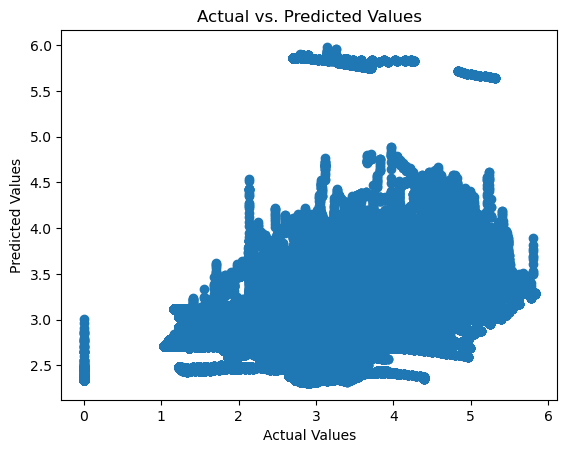

In [53]:
plt.scatter(y, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

In [16]:
y

month_id  country_id
252       1             3.732896
          2             3.349904
          3             3.277145
          4             2.990720
          5             3.005683
                          ...   
504       242           3.793239
          243           2.844909
          244           3.616309
          245           3.927896
          246           4.552824
Name: wdi_sh_dyn_mort_fe, Length: 4175, dtype: float64

In [17]:
X

const  wdi_ny_gdp_mktp_kd  wdi_sp_pop_totl  ged_sb_tlag1  \
month_id country_id                                                             
252      1             1.0           21.779484        13.539826      0.000000   
         2             1.0           21.795169        13.079454      0.000000   
         3             1.0           23.309243        14.102345      0.000000   
         4             1.0            0.000000        17.011230      0.000000   
         5             1.0           20.098032        12.122740      0.000000   
...                    ...                 ...              ...           ...   
504      242           1.0           24.884573        17.967941      1.098612   
         243           1.0           25.542467        17.428496      1.386294   
         244           1.0           22.728763        15.344817      0.000000   
         245           1.0           25.101865        17.636672      0.000000   
         246           1.0           23.207989        16.190256      0.000000   

                     ged_sb_tlag2  ged_sb_tlag3  ged_sb_tlag4  ged_sb_tlag5  \
month_id country_id                                                           
252      1               0.000000      0.000000      0.000000      0.000000   
         2               0.000000      0.000000      0.000000      0.000000   
         3               0.000000      0.000000      0.000000      0.000000   
         4               0.000000      0.000000      0.000000      0.000000   
         5               0.000000      0.000000      0.000000      0.000000   
...                           ...           ...           ...           ...   
504      242             0.000000      0.000000      1.791759      0.000000   
         243             0.000000      0.000000      0.000000      0.000000   
         244             0.000000      0.000000      0.000000      0.000000   
         245             1.386294      0.000000      0.000000      2.890372   
         246             1.098612      4.189655      3.496508      1.791759   

                     ged_sb_tlag6  ged_sb_tlag7  ...  ged_sb_tlag27  \
month_id country_id                              ...                  
252      1               0.000000      0.000000  ...       0.000000   
         2               0.000000      0.000000  ...       0.000000   
         3               0.000000      0.000000  ...       0.000000   
         4               0.000000      0.000000  ...       0.000000   
         5               0.000000      0.000000  ...       0.000000   
...                           ...           ...  ...            ...   
504      242             0.000000      0.000000  ...       0.000000   
         243             0.000000      0.000000  ...       0.000000   
         244             0.000000      0.000000  ...       0.000000   
         245             0.000000      0.000000  ...       0.000000   
         246             2.397895      2.302585  ...       2.833213   

                     ged_sb_tlag28  ged_sb_tlag29  ged_sb_tlag30  \
month_id country_id                                                
252      1                0.000000       0.000000            0.0   
         2                0.000000       0.000000            0.0   
         3                0.000000       0.000000            0.0   
         4                0.000000       0.000000            0.0   
         5                0.000000       0.000000            0.0   
...                            ...            ...            ...   
504      242              0.000000       0.000000            0.0   
         243              0.000000       0.000000            0.0   
         244              0.000000       0.000000            0.0   
         245              0.000000       0.000000            0.0   
         246              1.386294       2.197225            0.0   

                     ged_sb_tlag31  ged_sb_tlag32  ged_sb_tlag33  \
month_id country_id                                           

In [21]:
y = df['wdi_sh_dyn_mort_fe']
X = df.drop(columns=['wdi_sh_dyn_mort_fe'])  # Remove the target column from the features
X = X.iloc[:,0:2]
# Add a constant to the independent variables (intercept term)
#X = sm.add_constant(X)
#X = X.fillna(X.mean())

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the summary of the OLS model
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     wdi_sh_dyn_mort_fe   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          1.577e+04
Date:                Wed, 08 Nov 2023   Prob (F-statistic):                        0.00
Time:                        14:20:19   Log-Likelihood:                         -6347.6
No. Observations:                4175   AIC:                                  1.270e+04
Df Residuals:                    4173   BIC:                                  1.271e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [22]:
X

wdi_sp_pop_totl  ged_sb_tlag1
month_id country_id                               
252      1                 13.539826      0.000000
         2                 13.079454      0.000000
         3                 14.102345      0.000000
         4                 17.011230      0.000000
         5                 12.122740      0.000000
...                              ...           ...
504      242               17.967941      1.098612
         243               17.428496      1.386294
         244               15.344817      0.000000
         245               17.636672      0.000000
         246               16.190256      0.000000

[4175 rows x 2 columns]

In [23]:
y

month_id  country_id
252       1             3.732896
          2             3.349904
          3             3.277145
          4             2.990720
          5             3.005683
                          ...   
504       242           3.793239
          243           2.844909
          244           3.616309
          245           3.927896
          246           4.552824
Name: wdi_sh_dyn_mort_fe, Length: 4175, dtype: float64

In [38]:
model1 = smf.ols(formula='wdi_sh_dyn_mort_fe ~ wdi_ny_gdp_mktp_kd + wdi_sp_pop_totl + ged_sb_tlag1 + ged_sb_tlag2 + ged_sb_tlag3 + ged_sb_tlag4 + ged_sb_tlag5 + ged_sb_tlag6 + ged_sb_tlag7 + ged_sb_tlag8 + ged_sb_tlag9 + ged_sb_tlag10 + ged_sb_tlag11 + ged_sb_tlag12 + ged_sb_tlag13 + ged_sb_tlag14 + ged_sb_tlag15 + ged_sb_tlag16 + ged_sb_tlag17 + ged_sb_tlag18 + ged_sb_tlag19 + ged_sb_tlag20 + ged_sb_tlag21 + ged_sb_tlag22 + ged_sb_tlag23 + ged_sb_tlag24 + ged_sb_tlag25 + ged_sb_tlag26 + ged_sb_tlag27 + ged_sb_tlag28 + ged_sb_tlag29 + ged_sb_tlag30 + ged_sb_tlag31 + ged_sb_tlag32 + ged_sb_tlag33 + ged_sb_tlag34 + ged_sb_tlag35 + ged_sb_tlag36', data=df).fit()

# Fit Model 2 with two independent variables
model2 = smf.ols(formula='wdi_sh_dyn_mort_fe ~ wdi_ny_gdp_mktp_kd + wdi_sp_pop_totl', data=df).fit()

# Perform the F-test to compare the two models
f_test = model1.compare_f_test(model2)
print(f_test)


(74.98006843245155, 0.0, 36.0)
